In [11]:
import os
os.system('cls' if os.name == 'nt' else 'clear') # Clean the console

0

In [12]:
import numpy as np
from keras.models import Sequential
from keras import initializers
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD

In [13]:
input_loc = os.getcwd()

In [14]:
from keras.datasets import mnist
# train_images = mnist.train_images()
# train_labels = mnist.train_labels()
# test_images = mnist.test_images()
# test_labels = mnist.test_labels()

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [17]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [18]:
model = Sequential([
  Flatten(),
  Dense(300, activation='sigmoid'),
  Dense(200, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

In [19]:
model.compile(SGD(lr=.008), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size=32,
  epochs=20,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/20
  13/1875 [..............................] - ETA: 16s - loss: 2.3284 - accuracy: 0.1322

2023-03-10 21:40:55.773417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 2.2070 - accuracy: 0.3264

2023-03-10 21:41:08.360376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 8ms/step - loss: 2.2067 - accuracy: 0.3267 - val_loss: 2.0677 - val_accuracy: 0.4476
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 1.7845 - accuracy: 0.6211 - val_loss: 1.4217 - val_accuracy: 0.6919
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 1.1385 - accuracy: 0.7445 - val_loss: 0.9024 - val_accuracy: 0.7868
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7884 - accuracy: 0.8038 - val_loss: 0.6763 - val_accuracy: 0.8300
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6276 - accuracy: 0.8371 - val_loss: 0.5616 - val_accuracy: 0.8534
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5395 - accuracy: 0.8547 - val_loss: 0.4940 - val_accuracy: 0.8668
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4840 - accuracy: 0.8674 - val_loss: 0.4470 - val_accuracy: 0.8

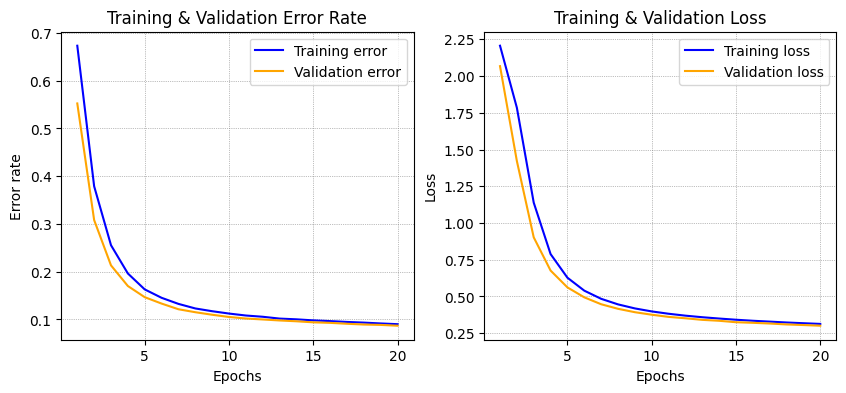

In [21]:
import matplotlib.pyplot as plt

# print(history.history)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
error = 1 - np.asarray(history_dict['accuracy'])
val_error = 1 - np.asarray(history_dict['val_accuracy'])
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, error, 'b', label='Training error')
ax[0].plot(epochs, val_error, 'orange', label='Validation error')
ax[0].set_title('Training & Validation Error Rate')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Error rate')
# ax[0].set_ylim([0,1])
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'orange', label='Validation loss')
ax[1].set_title('Training & Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
#
ax[1].grid(color='gray', linestyle=':', linewidth=0.5)
ax[0].grid(color='gray', linestyle=':', linewidth=0.5)
plt.savefig(input_loc + '/hw4_3_4_3.pdf', format='pdf', bbox_inches='tight') # Must be called before show()